In [1]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


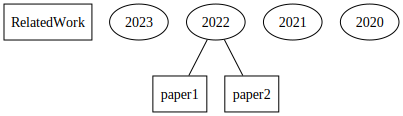

In [2]:
import graphviz
from graphviz import Digraph

# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('RelatedWork', shape='box')
dot.node('2023')
dot.node('2022')
dot.node('2021')
dot.node('2020')


# Add edges
#dot.edge('2023', '2022', arrowhead='none')
#dot.edge('2022', '2021', arrowhead='none')
#dot.edge('2021', '2020', arrowhead='none')

# Add paper
dot.node('paper1', shape='box')
dot.edge('2022', 'paper1', arrowhead='none')

dot.node('paper2', shape='box')
dot.edge('2022', 'paper2', arrowhead='none')

# Visualize the graph
dot

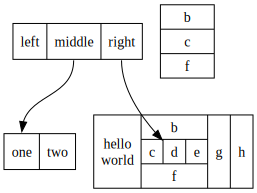

In [3]:
import graphviz

s = graphviz.Digraph('structs', filename='structs_revisited.gv',
                     node_attr={'shape': 'record'})

s.node('struct1', '<f0>left|<f1>middle|<f2>right')
s.node('struct2', '<f0> one|<f1> two')
s.node('struct3', r'hello\nworld |{ b |{c|<here> d|e}| f}| g | h')
s.node('struct4', '{ b |c| f}')

s.edges([('struct1:f1', 'struct2:f0'), ('struct1:f2', 'struct3:here')])

s

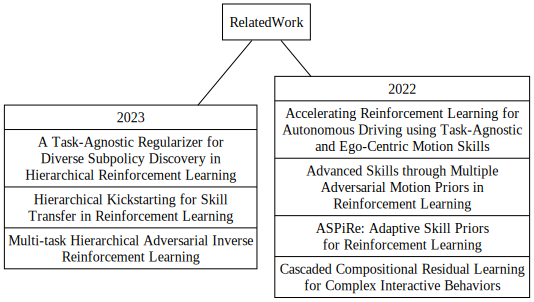

In [4]:
s = graphviz.Digraph('structs', filename='structs_revisited.gv',
                     node_attr={'shape': 'record'})

s.node('RelatedWork', shape='box')

def changeLine(paper):
    items = paper.split(" ")
    num_words = len(items)
    num_words_per_line = 4
    new_paper = ""
    for i in range(num_words):
        new_paper += items[i]
        if (i+1) % num_words_per_line == 0:
            new_paper += "\\n"
        else:
            new_paper += " "
    return new_paper

paper1 = "A Task-Agnostic Regularizer for Diverse Subpolicy Discovery in Hierarchical Reinforcement Learning"
paper2 = "Hierarchical Kickstarting for Skill Transfer in Reinforcement Learning"
paper3 = "Multi-task Hierarchical Adversarial Inverse Reinforcement Learning"

list_2023 = "2023"
list_2023 += "|" + changeLine(paper1)
list_2023 += "|" + changeLine(paper2)
list_2023 += "|" + changeLine(paper3)

paper1 = "Accelerating Reinforcement Learning for Autonomous Driving using Task-Agnostic and Ego-Centric Motion Skills"
paper2 = "Advanced Skills through Multiple Adversarial Motion Priors in Reinforcement Learning"
paper3 = "ASPiRe: Adaptive Skill Priors for Reinforcement Learning"
paper4 = "Cascaded Compositional Residual Learning for Complex Interactive Behaviors"

list_2022 = "2022"
list_2022 += "|" + changeLine(paper1)
list_2022 += "|" + changeLine(paper2)
list_2022 += "|" + changeLine(paper3)
list_2022 += "|" + changeLine(paper4)

s.node('2023', '{' + list_2023 + '}')
s.node('2022', '{' + list_2022 + '}')

s.edge('RelatedWork', '2023', arrowhead='none')
s.edge('RelatedWork', '2022', arrowhead='none')


s

In [5]:
from relatedworkanalyzer import RelatedWorkAnalyzer

In [6]:
rwa = RelatedWorkAnalyzer()

load from pkl


### Node generation

In [60]:
years = []
papers = {}
for paperId in rwa.paper_list['keypaper']:
    year = rwa.paper_list[paperId]['year']
    years.append(year)
    if year not in papers.keys():
        papers[year] = {paperId:rwa.paper_list[paperId]}
    else:
        papers[year][paperId] = rwa.paper_list[paperId]
    if rwa.paper_list[paperId]['year'] == None:
        print(rwa.paper_list[paperId]['title'])
years = list(set(years))

In [61]:
s = graphviz.Digraph('structs', filename='structs_revisited.gv',
                     node_attr={'shape': 'record'})

s.node('RelatedWork', shape='box')

for year in years:
    print(year)
    list_year = str(year)
    for paperId in papers[year]:
        #print(paperId)
        #print(papers[year][paperId])
        list_year += "|" + "<" + paperId + ">" + changeLine(papers[year][paperId]['title'])
    print(list_year)
    s.node(str(year), '{' + list_year + '}')
    s.edge('RelatedWork', str(year), arrowhead='none')
s.view()

2016
2016|<3c3861c607fb79f3fbf79552018724617fc8ba1b>A Deep Hierarchical Approach\nto Lifelong Learning in\nMinecraft |<3deecaee4ec1a37de3cb10420eaabff067669e17>Stochastic Neural Networks for\nHierarchical Reinforcement Learning |<15b26d8cb35d7e795c8832fe08794224ee1e9f84>The Option-Critic Architecture |<e2bd18c1039f27675bd64014117db648d969452e>Learning and Transfer of\nModulated Locomotor Controllers 
2017
2017|<17704b148b5c20ddf92acbaf1addda134ecbb474>Learning Multi-Level Hierarchies with\nHindsight |<ed9f58f4e8ee8dcacafdf06ffa58deaa6404ad69>DDCO: Discovery of Deep\nContinuous Options for Robot\nLearning from Demonstrations |<049c6e5736313374c6e594c34b9be89a3a09dced>FeUdal Networks for Hierarchical\nReinforcement Learning 
2018
2018|<b43d8c8b25bc65cbf3097480e9000649c79b7a51>Directed-Info GAIL: Learning Hierarchical\nPolicies from Unsegmented Demonstrations\nusing Directed Information |<96ae5d3ac1a1dcc365684bc92fcfa4d40d802bca>Neural probabilistic motor primitives\nfor humanoid control 

'structs_revisited.gv.pdf'

### Edge generation

In [64]:
for paperId in rwa.paper_list['keypaper']:
    for paper in rwa.paper_list[paperId]['citations']:
        if paper['paperId'] in rwa.paper_list['keypaper']:
            cited_paper = "{}:{}".format(rwa.paper_list[paperId]['year'], paperId)
            citing_paper = "{}:{}".format(rwa.paper_list[paper['paperId']]['year'], paper['paperId'])
            print("{} cited by {}".format(cited_paper, citing_paper))
            s.edge(cited_paper, citing_paper)
s.view()

    

2021:4a8b0e3b9e93c52670062b15cb2a8eae25b035a6 cited by 2022:a17a7256c04afee68f9aa0b7bfdc67fbca998b9c
2021:4a8b0e3b9e93c52670062b15cb2a8eae25b035a6 cited by 2022:8e9d84a7b2db57adda8d639c6d54c8977ef10761
2021:4a8b0e3b9e93c52670062b15cb2a8eae25b035a6 cited by 2022:947070ff65dc9a0b0024d299acdcfa8251b5118b
2021:4a8b0e3b9e93c52670062b15cb2a8eae25b035a6 cited by 2021:c85662dcd17eed4452019b640a30a323970472ef
2021:372715a73955b7fbc1daf816bd52c0641b3ff5f2 cited by 2022:6a4c74430e9c9c165ef3321edf6b4e9bdc36dea9
2021:372715a73955b7fbc1daf816bd52c0641b3ff5f2 cited by 2022:bd2ff852e86d16df09376f2dfdc934c533bb04a2
2021:372715a73955b7fbc1daf816bd52c0641b3ff5f2 cited by 2022:947070ff65dc9a0b0024d299acdcfa8251b5118b
2021:105f44c9d445de2b93d1297c2d5ac10cc776d654 cited by 2022:bd2ff852e86d16df09376f2dfdc934c533bb04a2
2021:105f44c9d445de2b93d1297c2d5ac10cc776d654 cited by 2022:e6548d97d82aa2710019951eb4eac034e1747aa1
2021:105f44c9d445de2b93d1297c2d5ac10cc776d654 cited by 2022:8e9d84a7b2db57adda8d639c6d54c89

'structs_revisited.gv.pdf'